In [ ]:
from google.colab import files
Housing = files.upload()


Saving Housing.csv to Housing (2).csv


In [ ]:
import pandas as pd

Housing1 = pd.read_csv('Housing.csv')
Housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [41]:
# import numpy as np

# def hazf_outliers(Housing1, column_name):
#     Q1 = Housing1[column_name].quantile(0.25)
#     Q3 = Housing1[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     bound_L = Q1 - 1.5 * IQR
#     bound_H = Q3 + 1.5 * IQR
#     Housing2 = Housing1[(Housing1[column_name] >= bound_L) & (Housing1[column_name] <= bound_H)]
#     return Housing2

# Imp_columns = ['SalePrice', 'Gr Liv Area', 'Lot Area']
# # for col in Imp_columns:
# #     Housing1 = hazf_outliers(Housing1, col)
# mask = np.ones(len(Housing1), dtype=bool)
# for col in Imp_columns:
#     mask &= hazf_outliers(Housing1, col)

# Housing1 = Housing1[mask]


# print("Tedade dadeha pas az hazfe outliers:", Housing1.shape[0])

In [ ]:
import numpy as np
import pandas as pd

def hazf_outliers(Housing, Sutun):
    Q1 = Housing[Sutun].quantile(0.25)
    Q3 = Housing[Sutun].quantile(0.75)
    IQR = Q3 - Q1
    bound_L = Q1 - 1.5 * IQR
    bound_H = Q3 + 1.5 * IQR
    return (Housing[Sutun] >= bound_L) & (Housing[Sutun] <= bound_H)


Imp_columns = ['SalePrice', 'Gr Liv Area', 'Overall Qual']

# Ba in mask har 3 sutun ba ham barresi mishavand
mask = np.ones(len(Housing1), dtype=bool)

for col in Imp_columns:
    mask &= hazf_outliers(Housing1, col)

Housing1 = Housing1[mask]

print("Tedade dadeha pas az hazfe outliers", Housing1.shape[0])


Tedade dadeha pas az hazfe outliers 2753


In [ ]:
# Shomareshe missing values ghabl az jaygozini
missing_values = Housing1.isnull().sum()
print("Tedad maghadire gomshode:")
print(missing_values[missing_values > 0])

# Jaygozinie missing values baraye sutunhaye adadi ba miangin
numeric_cols = Housing1.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Housing1[col] = Housing1[col].fillna(Housing1[col].mean())

# Jaygozinie missing values baraye sutunhaye gheyre adadi ba mode
non_numeric_cols = Housing1.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    Housing1[col] = Housing1[col].fillna(Housing1[col].mode()[0])

# Dadeha bad az jaygozinie missing values
print("Tedad maghadire gomshode bad az jaygozini:")
Housing3 = Housing1.isnull().sum()
print(Housing3[Housing3 > 0])

Tedad maghadire gomshode:
Lot Frontage       471
Alley             2559
Mas Vnr Type      1735
Mas Vnr Area        21
Bsmt Qual           76
Bsmt Cond           76
Bsmt Exposure       79
BsmtFin Type 1      76
BsmtFin SF 1         1
BsmtFin Type 2      77
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       1
Bsmt Half Bath       1
Fireplace Qu      1413
Garage Type        153
Garage Yr Blt      155
Garage Finish      155
Garage Cars          1
Garage Area          1
Garage Qual        155
Garage Cond        155
Pool QC           2746
Fence             2194
Misc Feature      2650
dtype: int64
Tedad maghadire gomshode bad az jaygozini:
Series([], dtype: int64)


In [ ]:
# Sutunhaye adadi
numeric_Housing = Housing1.select_dtypes(include=['int64', 'float64'])

# Estekhraje min, max, enheraf az meyar
Vizhegi_amari = numeric_Housing.describe().loc[['min', 'max', 'std']]

Vizhegi_amari = Vizhegi_amari.T
Vizhegi_amari.columns = ['Min', 'Max', 'Enheraf az meyar']

print(Vizhegi_amari)

                         Min           Max  Enheraf az meyar
Order                    1.0  2.930000e+03      8.495737e+02
PID              526301100.0  1.007100e+09      1.886639e+08
MS SubClass             20.0  1.900000e+02      4.322874e+01
Lot Frontage            21.0  3.130000e+02      1.992355e+01
Lot Area              1300.0  1.646600e+05      6.660146e+03
Overall Qual             2.0  1.000000e+01      1.276573e+00
Overall Cond             1.0  9.000000e+00      1.114003e+00
Year Built            1872.0  2.010000e+03      2.999233e+01
Year Remod/Add        1950.0  2.010000e+03      2.089510e+01
Mas Vnr Area             0.0  1.600000e+03      1.510944e+02
BsmtFin SF 1             0.0  1.880000e+03      4.015031e+02
BsmtFin SF 2             0.0  1.526000e+03      1.650153e+02
Bsmt Unf SF              0.0  2.042000e+03      4.284013e+02
Total Bsmt SF            0.0  3.206000e+03      3.818052e+02
1st Flr SF             372.0  2.524000e+03      3.345000e+02
2nd Flr SF              

Vizhegihaye ba hambastegie bishtar ba gheymate khane
SalePrice         1.000000
Overall Qual      0.792924
Gr Liv Area       0.665150
Garage Cars       0.631674
Year Built        0.610261
Garage Area       0.605120
Total Bsmt SF     0.583202
Year Remod/Add    0.564671
Full Bath         0.554965
1st Flr SF        0.549797
Garage Yr Blt     0.533003
Name: SalePrice, dtype: float64


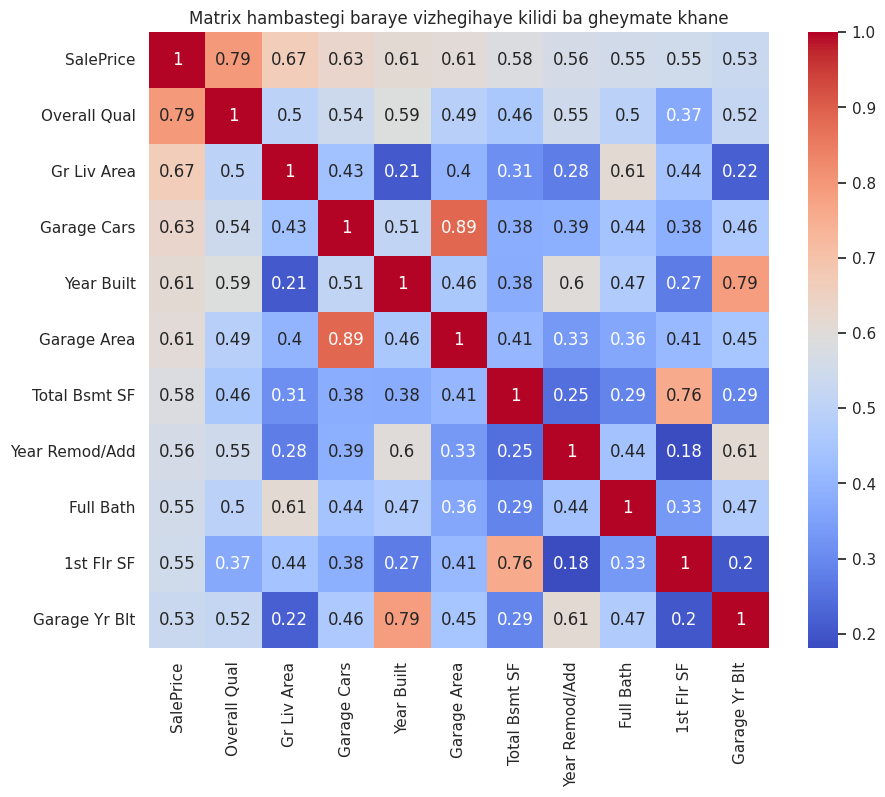

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matrix hambastegi baraye sutunhaye adadi
Matrix_hambastegi = Housing1.corr(numeric_only=True)

# Hambastegi ba gheymat
Hambastegi_ba_gheymat = Matrix_hambastegi['SalePrice'].sort_values(ascending=False)

Hambastegi_bala = Hambastegi_ba_gheymat[(Hambastegi_ba_gheymat > 0.5) | (Hambastegi_ba_gheymat < -0.5)]

print("Vizhegihaye ba hambastegie bishtar ba gheymate khane")
print(Hambastegi_bala)

# Nemudar baraye 10 vizhegi
vizhegihaye_kilidi = Hambastegi_bala.index
plt.figure(figsize=(10, 8))
sns.heatmap(Housing1[vizhegihaye_kilidi].corr(), annot=True, cmap='coolwarm')
plt.title('Matrix hambastegi baraye vizhegihaye kilidi ba gheymate khane')
plt.show()


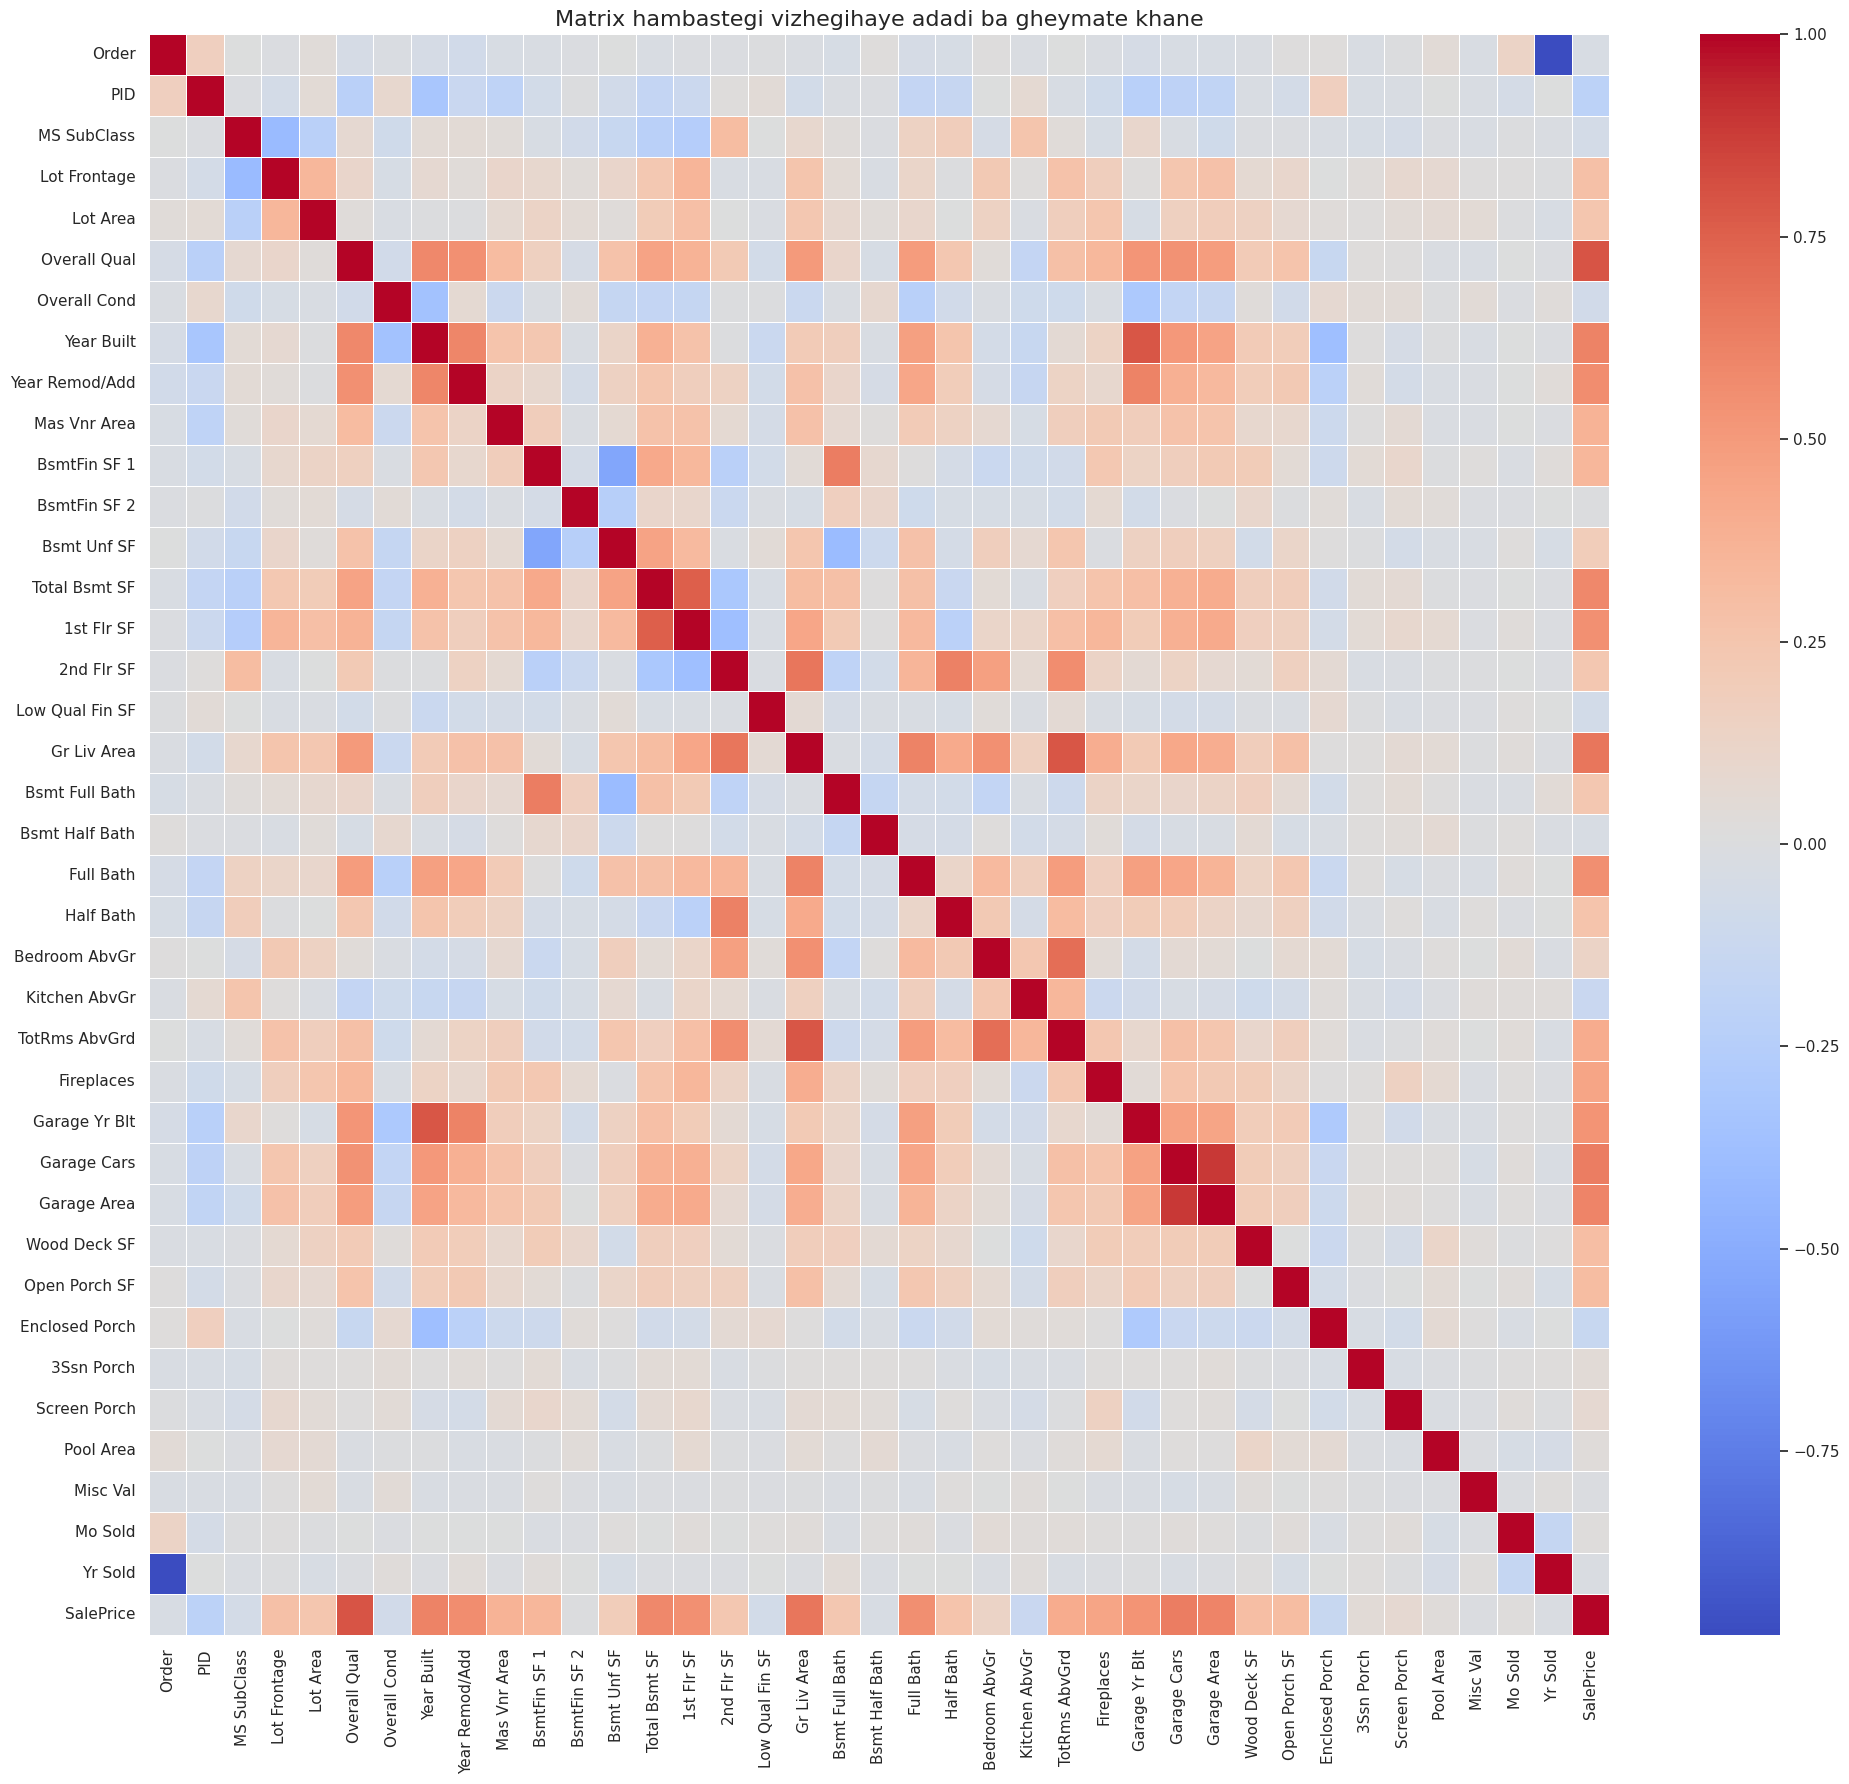

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matrix hambastegi baraye dadehaye adadi
Matrix_hambastegi2 = Housing1.corr(numeric_only=True)

plt.figure(figsize=(20, 18))
sns.heatmap(Matrix_hambastegi2, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matrix hambastegi vizhegihaye adadi ba gheymate khane', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


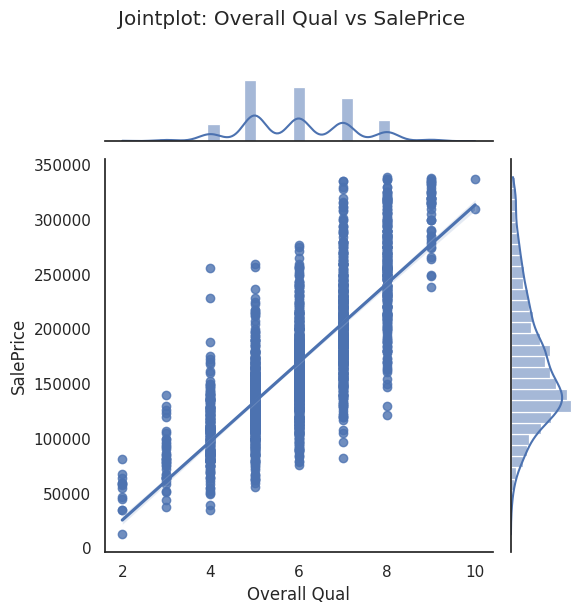

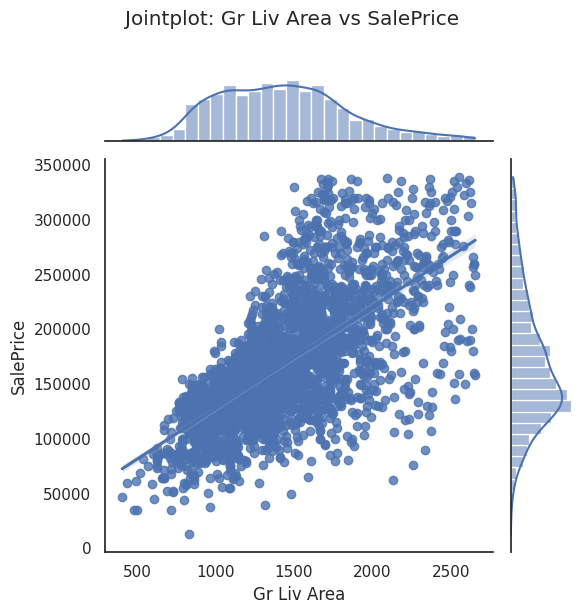

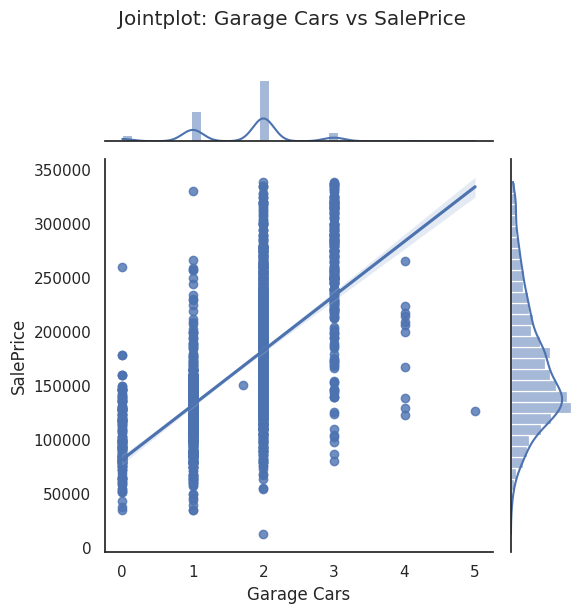

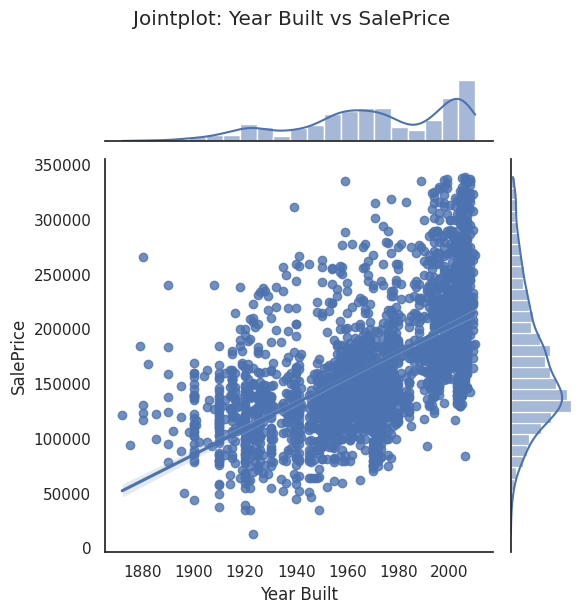

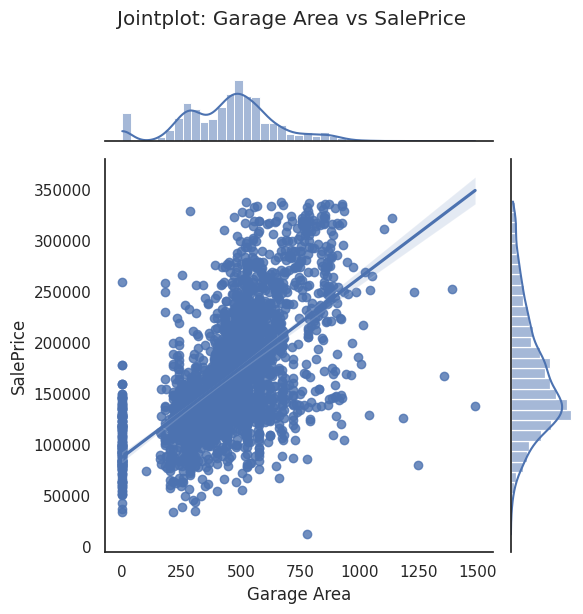

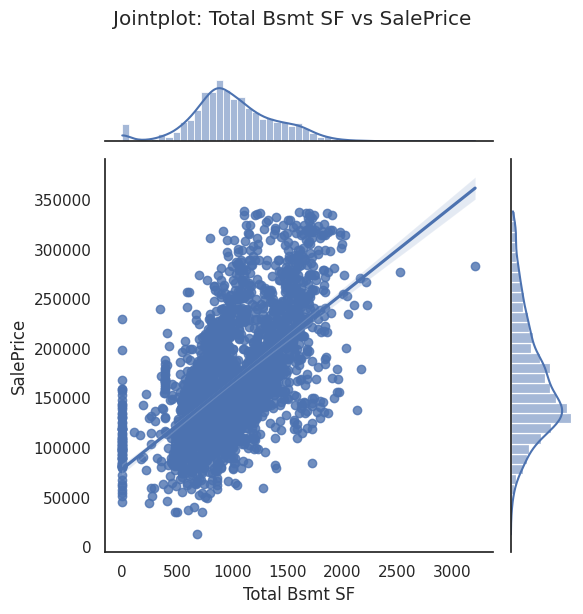

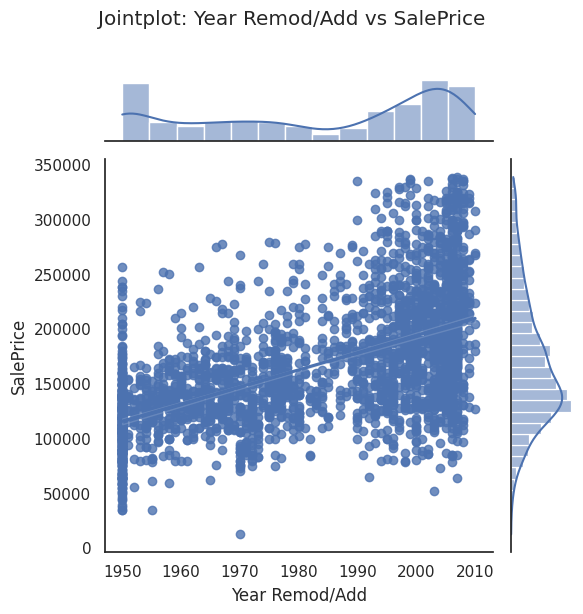

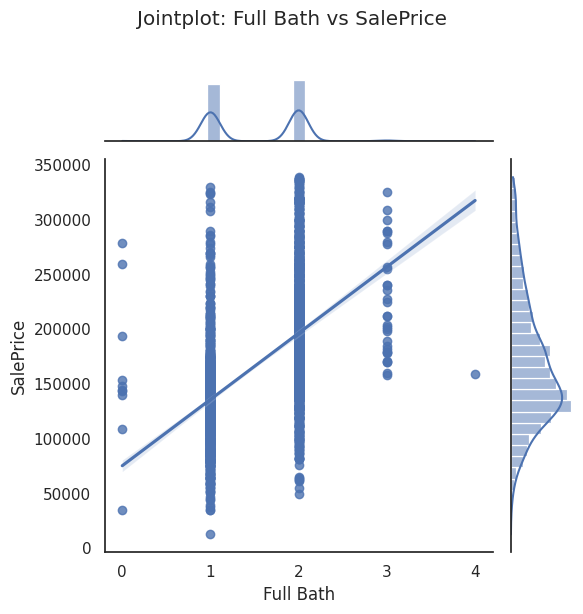

In [ ]:
sns.set(style="white", color_codes=True)

Vizhegi_hambastegi_bala = ['Overall Qual', 'Gr Liv Area', 'Garage Cars',
                           'Year Built','Garage Area','Total Bsmt SF',
                           'Year Remod/Add','Full Bath']

for vizhegi in Vizhegi_hambastegi_bala:
    sns.jointplot(data=Housing1, x=vizhegi, y='SalePrice', kind='reg', height=6)
    plt.suptitle(f"Jointplot: {vizhegi} vs SalePrice", y=1.02)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Joda kardane vizhegiha va hadaf
vizhegiha = Housing1.drop(columns=['SalePrice'])
vizhegi_adadi = vizhegiha.select_dtypes(include=[np.number])
hadaf = Housing1['SalePrice']

Behtarin = -np.inf
Behtarin_k = 0
scores = []

for k in range(1, vizhegi_adadi.shape[1] + 1):
    selector = SelectKBest(score_func=f_regression, k=k)
    vizhegi_entekhabi = selector.fit_transform(vizhegi_adadi, hadaf)

    # Arzyabie deghate model(cross validation)
    model = LinearRegression()
    score = cross_val_score(model, vizhegi_entekhabi, hadaf, cv=5, scoring='r2').mean()
    scores.append(score)

    if score > Behtarin:
        Behtarin = score
        best_k = k

# Behtarin tedade vizhegiha = k
# Bishtarin deghat (R^2)
print(f"k: {best_k}")
print(f"R^2: {Behtarin:.4f}")


k: 30
R^2: 0.8734


In [ ]:
# Amuzesh ba behtarin k az bakhshe ghabl
selector = SelectKBest(score_func=f_regression, k=best_k)
selector.fit(vizhegi_adadi, hadaf)

# Vizhegihaye entekhab shode
vizhegiha_entekhabi = vizhegi_adadi.columns[selector.get_support()]
print("Vizhegihaye entekhab shode:")
print(vizhegiha_entekhabi)


Vizhegihaye entekhab shode:
Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       'Screen Porch'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Joda kardane vizhegiha va hadaf bad az taeine vizhegihaye entekhabi
X = vizhegi_adadi[vizhegiha_entekhabi]
y = hadaf

# Taghsime dadeha be test va train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

# Andazeha
print(f"Tedad nemunehaye amuzesh: {X_train.shape[0]}")
print(f"Tedad nemunehaye azmun: {X_test.shape[0]}")


Tedad nemunehaye amuzesh: 2064
Tedad nemunehaye azmun: 689


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Tarife modelha
models = {'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=10000),
    'Polynomial Regression (degree=2)': make_pipeline(PolynomialFeatures(degree=2),
                                                      LinearRegression())}

for name, model in models.items():
    model.fit(X_train, y_train) # Amuzeshe model
    y2 = model.predict(X_test) # Pishbini ruye dadeye test
    R2 = r2_score(y_test, y2)
    RMSE = np.sqrt(mean_squared_error(y_test, y2))
    print(f"{name}")
    print(f"R²: {R2:.4f}")
    print(f"RMSE: {RMSE:.2f}\n")


Linear Regression
R²: 0.8836
RMSE: 20733.90

Ridge Regression
R²: 0.8836
RMSE: 20731.56

Lasso Regression
R²: 0.8836
RMSE: 20733.85



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.36144e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Polynomial Regression (degree=2)
R²: 0.8783
RMSE: 21199.49



In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#Tarife modelha
models = {'Linear Regression': LinearRegression()}

# Entekhabe alpha monaseb baraye Ridge regression
alpha_R = {'alpha': [0.01, 0.1, 1, 10, 100]}
alpha_R1 = GridSearchCV(Ridge(), alpha_R, cv=5, scoring='r2')
alpha_R1.fit(X_train, y_train)
models['Ridge Regression'] = alpha_R1.best_estimator_

# Entekhabe alpha monaseb baraye Ridge regression
alpha_L = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
alpha_L1 = GridSearchCV(Lasso(max_iter=10000), alpha_L, cv=5, scoring='r2')
alpha_L1.fit(X_train, y_train)
models['Lasso Regression'] = alpha_L1.best_estimator_

# Entekhabe daraje monaseb baraye Polynomial regression
degree = {'polynomialfeatures__degree': [2, 3]}
poly_model = make_pipeline(PolynomialFeatures(), LinearRegression())
degree_poly = GridSearchCV(poly_model, degree, cv=5, scoring='r2')
degree_poly.fit(X_train, y_train)
models['Polynomial Regression'] = degree_poly.best_estimator_


for name, model in models.items():
    model.fit(X_train, y_train)  # Amuzeshe model
    y_pred = model.predict(X_test) # Pishbini ruye dadeye test
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}")
    print(f"R²: {R2:.4f}")
    print(f"RMSE: {RMSE:.2f}\n")

print("Best alpha for Ridge:", alpha_R1.best_params_['alpha'])
print("Best alpha for Lasso:", alpha_L1.best_params_['alpha'])
print("Best degree for Polynomial:", degree_poly.best_params_['polynomialfeatures__degree'])


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.70247e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.70184e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.70392e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.70227e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

Linear Regression
R²: 0.8836
RMSE: 20733.90

Ridge Regression
R²: 0.8838
RMSE: 20716.00

Lasso Regression
R²: 0.8836
RMSE: 20733.38



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.36135e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Polynomial Regression
R²: 0.8783
RMSE: 21199.49

Best alpha for Ridge: 10
Best alpha for Lasso: 1
Best degree for Polynomial: 2


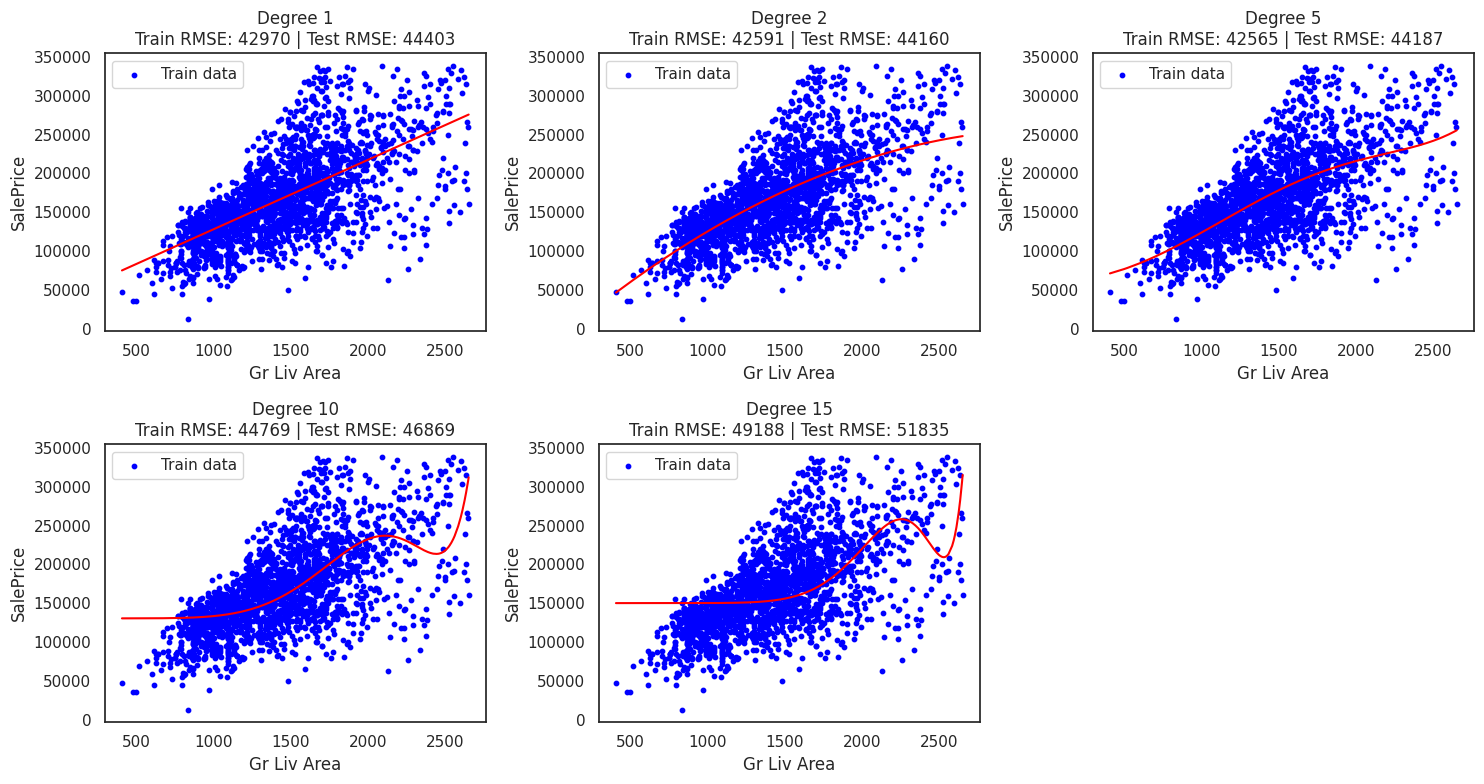

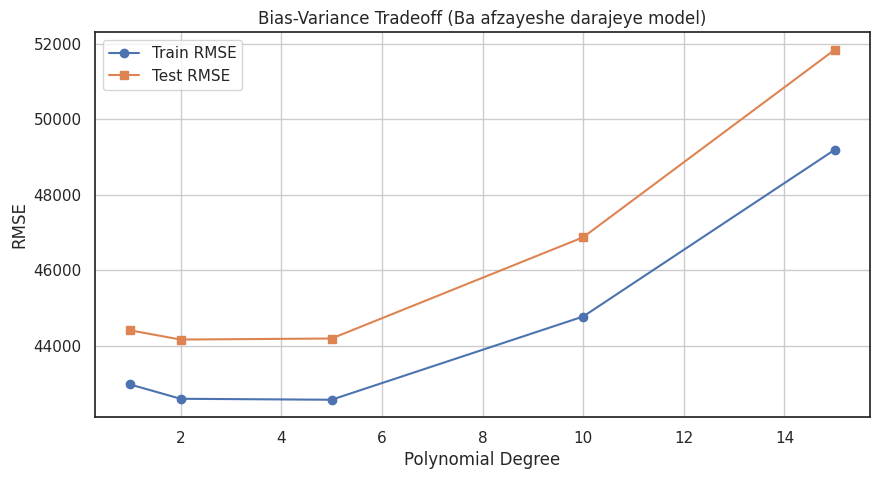

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Yek vizhegi va hadaf
X1 = Housing1[['Gr Liv Area']].values
y1 = Housing1['SalePrice'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 5 darajeye mokhtalef
degrees = [1, 2, 5, 10, 15]
train_errors = []
test_errors = []

plt.figure(figsize=(15, 8))

for idx, degree in enumerate(degrees, start=1):

    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression())
    model.fit(X1_train, y1_train)

    y2_train = model.predict(X1_train)
    y2_test = model.predict(X1_test)

    train_rmse = np.sqrt(mean_squared_error(y1_train, y2_train))
    test_rmse = np.sqrt(mean_squared_error(y1_test, y2_test))
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# Rasme nemudar
    plt.subplot(2, 3, idx)
    plt.scatter(X1_train, y1_train, color='blue', s=10, label='Train data')
    plt.plot(np.sort(X1_train, axis=0), model.predict(np.sort(X1_train, axis=0)), color='red')
    plt.title(f'Degree {degree}\nTrain RMSE: {train_rmse:.0f} | Test RMSE: {test_rmse:.0f}')
    plt.xlabel('Gr Liv Area')
    plt.ylabel('SalePrice')
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, label='Train RMSE', marker='o')
plt.plot(degrees, test_errors, label='Test RMSE', marker='s')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Bias-Variance Tradeoff (Ba afzayeshe darajeye model)')
plt.legend()
plt.grid(True)
plt.show()
